# Connect with an LLM
* Start talking with ChatGPT.

## Intro
* Input: the prompt we send to the LLM.
* Output: the response from the LLM.
* We can switch LLMs and use several different LLMs.

## LangChain divides LLMs in two types
1. LLM Model: text-completion model.
2. Chat Model: converses with a sequence of messages and can have a particular role defined (system prompt). This type has become the most used in LangChain.


## See the differences
* Even when sometimes the LangChain documentation can be confusing about it, the fact is that text-completion models and Chat models are both LLMs.
* But, as you can see in this [playground](https://platform.openai.com/playground/chat?models=gpt-4o), they have some significant differences. See that the chat models in LangChain have system messages, human messages (called "user messages" by OpenAI) and AI messages (called "Assitant Messages" by OpenAI).
* Since the launch of chatGPT, the Chat Model is the most popular LLM type and is used in most LLM apps.

## List of LLMs that can work with LangChain
* See the list [here](https://python.langchain.com/v0.1/docs/integrations/llms/).


## LLMs (Large Language Models) have some built-in features 
that make them work efficiently in different situations. These features help in running tasks smoothly without making your system slow. Here’s how they work:

### Async Support (Handling Tasks Without Waiting)
Imagine you are cooking dinner and doing laundry at the same time. Instead of waiting for the washing machine to finish before you start cooking, you can do both together.

LLMs use a method that lets your app do other tasks while waiting for the LLM to respond.
This prevents your program from freezing or slowing down.

### Streaming Support (Getting Responses in Parts Instead of Waiting for Everything)
Imagine you’re watching a YouTube video. Instead of downloading the entire video before watching, it plays while still loading.

LLMs can send back small parts of their response as they process your request.
This helps when you need results quickly instead of waiting for the whole thing.

### Batch Support (Handling Multiple Requests Together)
Imagine you’re ordering food for a group of friends. Instead of placing separate orders for each person, you order everything at once.

LLMs can process multiple inputs at the same time.
This speeds things up, especially when handling many requests.
These features ensure that LLMs work efficiently in real-world applications, making them fast and responsive.

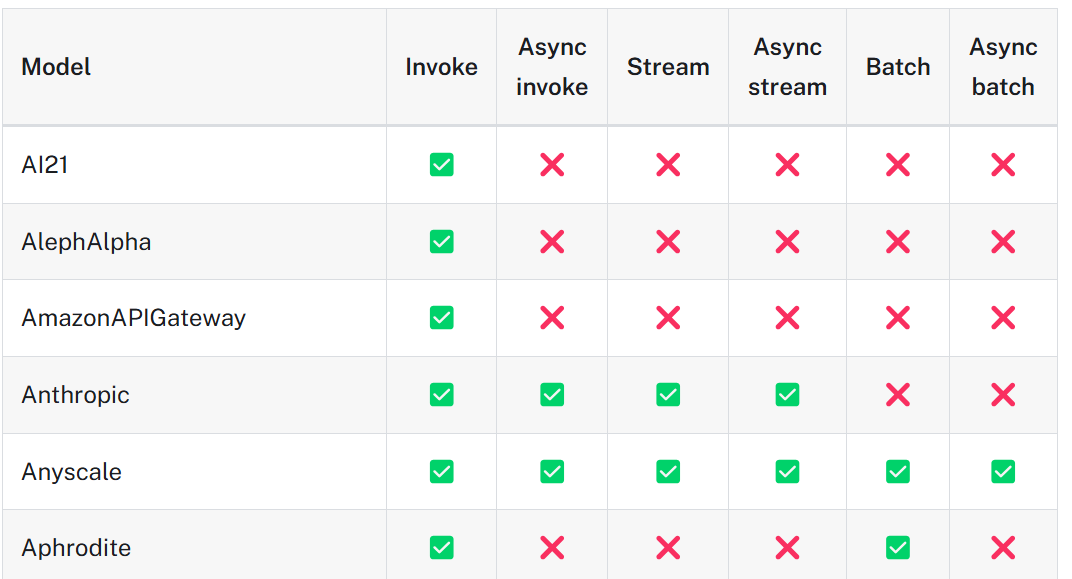

In [1]:
#pip install python-dotenv

In [1]:
import os
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())
openai_api_key = os.environ["OPENAI_API_KEY"]

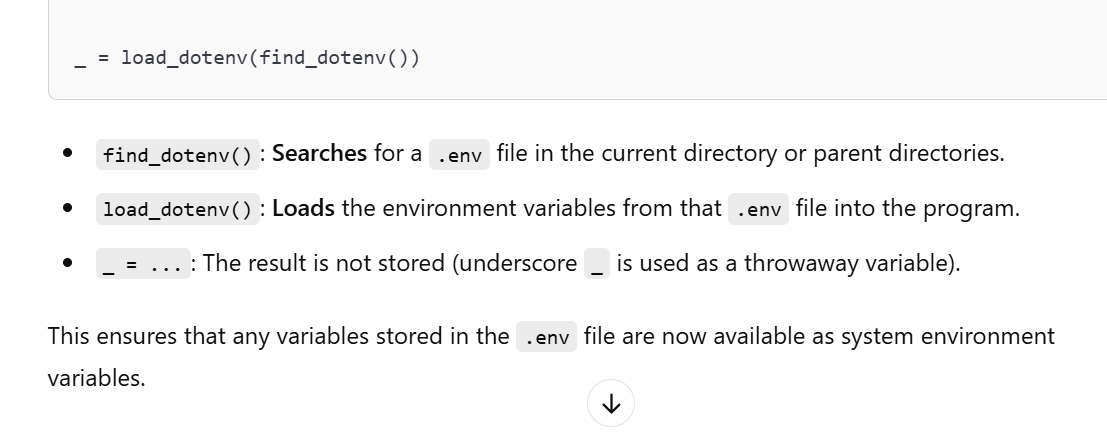

In [3]:
# openai_api_key

#### Install LangChain

If you are using the pre-loaded poetry shell, you do not need to install the following package because it is already pre-loaded for you:

In [3]:
#!pip install langchain

## Connect with an LLM

If you are using the pre-loaded poetry shell, you do not need to install the following package because it is already pre-loaded for you:

In [4]:
#!pip install langchain-openai

* NOTE: Since right now is the best LLM in the market, we will use OpenAI by default. You will see how to connect with other Open Source LLMs like Llama3 or Mistral in a next lesson.

## LLM Model
* completion model
* The trend before the launch of chatGPT-4.
* See LangChain documentation about LLM Models [here](https://python.langchain.com/v0.1/docs/modules/model_io/llms/).

In [2]:
from langchain_openai import OpenAI## completion model

llmModel = OpenAI()

#### Invoke: all the text of the reponse is printed at once.

In [ ]:
response = llmModel.invoke(
    "Tell me one fun fact about the Kennedy family."
)

In [4]:
response

'\n\nOne fun fact about the Kennedy family is that they had a pet pony named Macaroni, which was a gift to Caroline Kennedy from Vice President Lyndon B. Johnson. Macaroni lived on the White House lawn and was often ridden by Caroline and her brother John F. Kennedy Jr.'

In [7]:
print(response)



One fun fact about the Kennedy family is that they have a long-standing tradition of playing touch football on Thanksgiving. This tradition was started by President John F. Kennedy and his brothers and has been passed down through generations, with family members and friends participating in the game every year.


#### Streaming: printing one chunk of text at a time

In [8]:
for chunk in llmModel.stream(
    "Tell me one fun fact about the Kennedy family."
):
    print(chunk, end="", flush=True)



John F. Kennedy, the 35th President of the United States, had a pet pony named Macaroni that lived at the White House and would often roam the grounds.

#### Temperature: more or less creativity

* less temparature means less: creative : stick to just exact output
* more temperature meand more : creative : creative answer

In [ ]:

creativeLlmModel = OpenAI(temperature=0.9) ##creativity

In [10]:
response = llmModel.invoke(
    "Write a short 5 line poem about JFK"
)

In [11]:
print(response)



A leader with charm and grace,
A symbol of hope for the human race,
His words still echo in our minds,
His legacy forever shines,
JFK, a president truly one of a kind.


## Chat Model
* The general trend after the launch of chatGPT-4.
    * Frequently known as "Chatbot". 
    * Conversation between Human and AI.
    * Can have a system prompt defining the tone or the role of the AI. 
* See LangChain documentation about Chat Models [here](https://python.langchain.com/v0.1/docs/modules/model_io/chat/).
* By default we will work with ChatOpenAI. See [here](https://python.langchain.com/v0.1/docs/integrations/chat/openai/) the LangChain documentation page about it.

In [12]:
from langchain_openai import ChatOpenAI

chatModel = ChatOpenAI(model="gpt-3.5-turbo-0125")

In [13]:
messages = [
    ("system", "You are an historian expert in the Kennedy family."),
    ("human", "Tell me one curious thing about JFK."),
]
response = chatModel.invoke(messages)

In [14]:
response

AIMessage(content='One curious thing about JFK is that he won a Pulitzer Prize in 1957 for his book "Profiles in Courage," which he wrote while serving as a U.S. Senator. However, there has been some controversy and speculation over how much of the book was actually written by Kennedy himself, as some sources suggest that he had significant help from his speechwriter Ted Sorensen. Despite this, JFK was officially credited as the sole author of the book when he received the prize.', response_metadata={'token_usage': {'completion_tokens': 97, 'prompt_tokens': 29, 'total_tokens': 126, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-4b9cdaae-ae33-49be-9ade-4a0c6cbf1f70-0', usage_metadata={'input_tokens': 29, 'output_tokens': 97, 'total_tokens': 126})

In [15]:
response.content

'One curious thing about JFK is that he won a Pulitzer Prize in 1957 for his book "Profiles in Courage," which he wrote while serving as a U.S. Senator. However, there has been some controversy and speculation over how much of the book was actually written by Kennedy himself, as some sources suggest that he had significant help from his speechwriter Ted Sorensen. Despite this, JFK was officially credited as the sole author of the book when he received the prize.'

In [16]:
response.response_metadata

{'token_usage': {'completion_tokens': 97,
  'prompt_tokens': 29,
  'total_tokens': 126,
  'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0},
  'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}},
 'model_name': 'gpt-3.5-turbo-0125',
 'system_fingerprint': None,
 'finish_reason': 'stop',
 'logprobs': None}

In [17]:
response.schema()

{'title': 'AIMessage',
 'description': 'Message from an AI.\n\nAIMessage is returned from a chat model as a response to a prompt.\n\nThis message represents the output of the model and consists of both\nthe raw output as returned by the model together standardized fields\n(e.g., tool calls, usage metadata) added by the LangChain framework.',
 'type': 'object',
 'properties': {'content': {'title': 'Content',
   'anyOf': [{'type': 'string'},
    {'type': 'array',
     'items': {'anyOf': [{'type': 'string'}, {'type': 'object'}]}}]},
  'additional_kwargs': {'title': 'Additional Kwargs', 'type': 'object'},
  'response_metadata': {'title': 'Response Metadata', 'type': 'object'},
  'type': {'title': 'Type', 'default': 'ai', 'enum': ['ai'], 'type': 'string'},
  'name': {'title': 'Name', 'type': 'string'},
  'id': {'title': 'Id', 'type': 'string'},
  'example': {'title': 'Example', 'default': False, 'type': 'boolean'},
  'tool_calls': {'title': 'Tool Calls',
   'default': [],
   'type': 'array'

UPDATE: How to use OpenAI's GPT-4o Mini instead of GPT3.5
According to the last benchmarks (see a very good comparative here https://context.ai/compare/gpt-4o-mini/gpt-3-5-turbo), the new OpenAI LLM GPT-4o Mini is now better and cheaper than GPT-3.5 Turbo.

Using GPT-4o Mini in the exercises and projects of this bootcamp is very easy, you just have to change the line of code where we configure the LLM.

Where you see this:

llm = ChatOpenAI(model="gpt-3.5-turbo")

Write this instead:

llm = ChatOpenAI(model="gpt-4o-mini")

#### Before the previous one, the old way (but still very popular) of doing this was:

In [19]:
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_core.prompts import ChatPromptTemplate

In [20]:
messages = [
    SystemMessage(content="You are an historian expert on the Kennedy Family."),
    HumanMessage(content="How many children had Joseph P. Kennedy?"),
]

response = chatModel.invoke(messages)

In [21]:
response

AIMessage(content='Joseph P. Kennedy and his wife Rose Fitzgerald Kennedy had nine children. Their children were Joseph Jr., John F. (JFK), Rosemary, Kathleen, Eunice, Patricia, Robert F. (Bobby), Jean, and Edward M. (Ted).', response_metadata={'token_usage': {'completion_tokens': 54, 'prompt_tokens': 30, 'total_tokens': 84}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-63964416-759f-461a-aecb-789b336ce0c1-0', usage_metadata={'input_tokens': 30, 'output_tokens': 54, 'total_tokens': 84})

#### Streaming:

In [22]:
for chunk in chatModel.stream(messages):
    print(chunk.content, end="", flush=True)

Joseph P. Kennedy and his wife Rose Kennedy had nine children: Joseph Jr., John F. (JFK), Rosemary, Kathleen, Eunice, Patricia, Robert (Bobby), Jean, and Edward (Ted).

#### Another old way, similar results:

In [23]:
prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are expert {profession} in {topic}.",
        ),
        ("human", "{input}"),
    ]
)

chain = prompt | chatModel

response = chain.invoke(
    {
        "profession": "Historian",
        "topic": "Kennedy Family",
        "input": "Tell me one fun fact about JFK.",
    }
)

In [24]:
response

AIMessage(content='One fun fact about JFK is that he was the first president to hold a press conference that was broadcast live on television. This event took place on January 25, 1961, and it allowed the American public to see and hear their president in real-time, marking a significant shift in how political communication was conducted.', response_metadata={'token_usage': {'completion_tokens': 64, 'prompt_tokens': 28, 'total_tokens': 92}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-3e6f4f2c-a7fe-4220-925e-1e3a6954cc57-0', usage_metadata={'input_tokens': 28, 'output_tokens': 64, 'total_tokens': 92})

## How to execute the code from Visual Studio Code
* In Visual Studio Code, see the file 001-connect-llms.py
* In terminal, make sure you are in the directory of the file and run:
    * python 001-connect-llm.py